<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_2_4_Liver_Disease_Prediction_using_Random_Forest_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Setting Up Your Environment

In [14]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [15]:
# Import necessary libraries

In [16]:
import pandas as pd # For data manipulation and analysis

In [17]:
import seaborn as sns # For statistical data visualization

In [18]:
import matplotlib.pyplot as plt # For creating plots and visualizations

In [19]:
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

In [20]:
from sklearn.ensemble import RandomForestClassifier   # For training the Random Forest model

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation

In [22]:
from sklearn.preprocessing import LabelEncoder         # For encoding categorical variables

# Step 2: Loading the Dataset

In [23]:
# Load the dataset from the provided CSV file

In [24]:
url = "/content/indian_liver_patient.csv"

In [25]:
df = pd.read_csv(url)

In [26]:
# Encoding categorical variable "Gender" using LabelEncoder
# This step transforms the categorical variable "Gender" into numerical values
# Male -> 1, Female -> 0

In [27]:
label_encoder = LabelEncoder()

In [28]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [29]:
# Display the first few rows of the dataset to understand its structure

In [30]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3       

# Step 3: Exploratory Data Analysis (EDA)

In [31]:
# Summary statistics to get an overview of the numerical features in the dataset

In [32]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  583.000000  583.000000       583.000000        583.000000   
mean    44.746141    0.756432         3.298799          1.486106   
std     16.189833    0.429603         6.209522          2.808498   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    1.000000         0.800000          0.200000   
50%     45.000000    1.000000         1.000000          0.300000   
75%     58.000000    1.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            583.000000                583.000000   
mean             290.576329                 80.713551   
std              242.937989                182.620356   
min               63.000000                 10.000000   
25%              175.500000                 23.000000   
50%              208.000

In [33]:
# Check for missing values in the dataset
# This step is crucial for identifying any missing or null values in the dataset

In [34]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [35]:
# Visualizing the data
# Distribution of the target variable "Dataset" which indicates the presence of liver disease
# This plot helps in understanding the balance of classes in the target variable

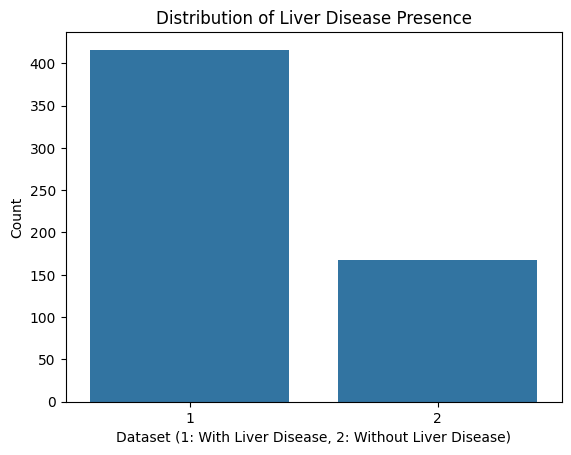

In [36]:
sns.countplot(x='Dataset', data=df)
plt.title('Distribution of Liver Disease Presence')
plt.xlabel('Dataset (1: With Liver Disease, 2: Without Liver Disease)')
plt.ylabel('Count')
plt.show()

In [37]:
# Correlation matrix heatmap
# A correlation matrix shows the correlation coefficients between features in a dataset
# It helps in understanding the relationships between different variables

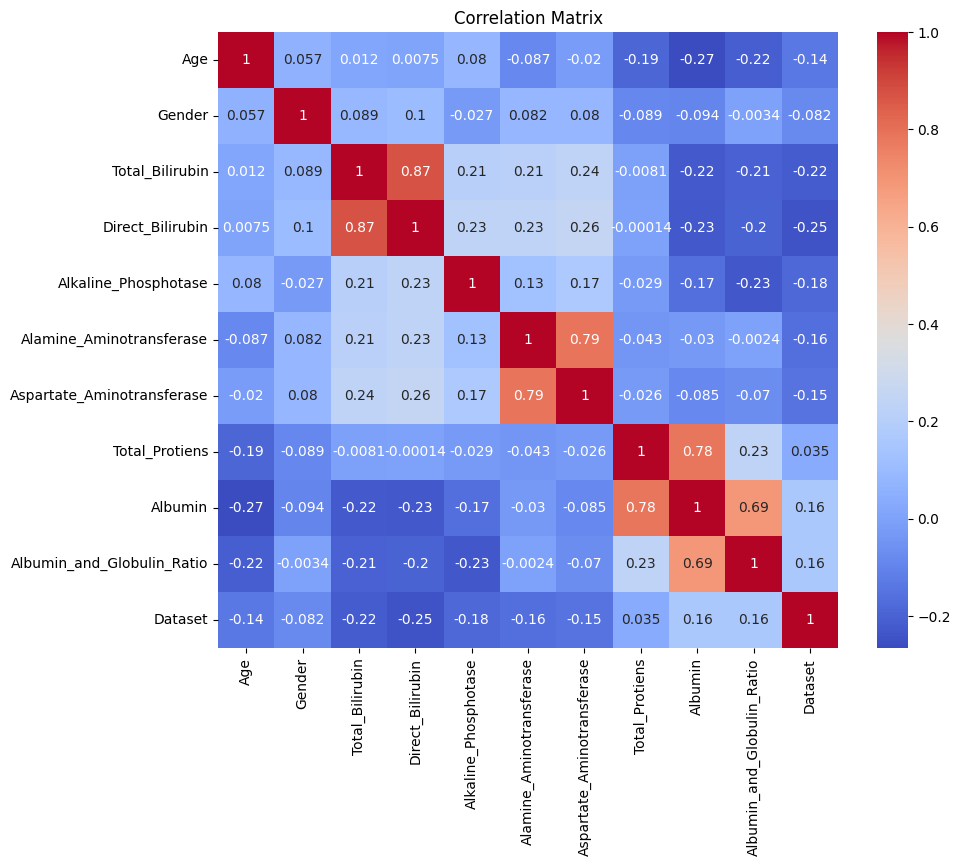

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 4: Data Preprocessing

In [39]:
# Data Preprocessing
# Handling missing values - filling missing values in "Albumin_and_Globulin_Ratio" with median
# Missing values can affect the performance of machine learning models, so it's important to handle them appropriately


In [40]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [41]:
# Splitting the dataset into training and testing sets
# This step divides the dataset into two parts: one for training the model and the other for testing its performance

In [42]:
X = df.drop('Dataset', axis=1)   # Features (independent variables)

In [43]:
y = df['Dataset']    # Target variable (dependent variable)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Training the Random Forest Model

In [45]:
# Training the Random Forest Model
# Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the class that is the mode of the classes (classification) of the individual trees



In [46]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the model with 100 decision trees

In [47]:
# Train the Random Forest model on the training data

In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 6: Model Evaluation

In [49]:
# Model Evaluation
# Evaluation of the model's performance on the test data
# Making predictions on the test data

In [50]:
predictions = rf.predict(X_test)

In [51]:
# Evaluation metrics - Confusion matrix, classification report, and accuracy

In [52]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[75 12]
 [18 12]]


In [53]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.86      0.83        87
           2       0.50      0.40      0.44        30

    accuracy                           0.74       117
   macro avg       0.65      0.63      0.64       117
weighted avg       0.73      0.74      0.73       117



In [54]:
print("\nAccuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.7435897435897436


# Step 7: Feature Importance

In [55]:
# Feature Importance
# Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable
# Understanding feature importance helps in identifying the most relevant features for predicting liver disease

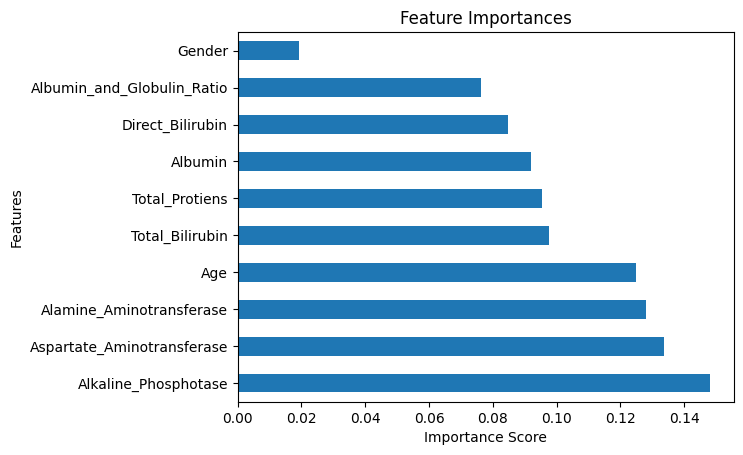

In [59]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# step 8: Predictions

In [61]:
# Predictions
# Using the trained Random Forest model, we make predictions on the test set.

In [62]:
predictions = rf.predict(X_test)

In [63]:
# Create a DataFrame to store the predictions
# We create a new DataFrame called `results_df` to store the actual values (ground truth) and the predicted values.
# This DataFrame helps us compare the model's predictions with the actual values for evaluation and analysis purposes.


In [64]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [65]:
# Save the results to a CSV file
# Once we have the predictions stored in the DataFrame, we use the `to_csv()` method to save them into a CSV file.
# The parameter `index=False` ensures that the DataFrame index is not included in the saved file.
# This CSV file can be used for further analysis, reporting, or sharing with stakeholders.

In [66]:
results_df.to_csv('liver_disease_predictions.csv', index=False)